In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

In [2]:
df_train=pd.read_csv("/content/Classification_train.zip")
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train_1=df_train.drop(['label'],axis=1).values
Y_train_1=df_train['label'].values
print("X_train=",X_train_1)
print("Y_train=",Y_train_1)

X_train= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Y_train= [0 8 1 ... 9 3 9]


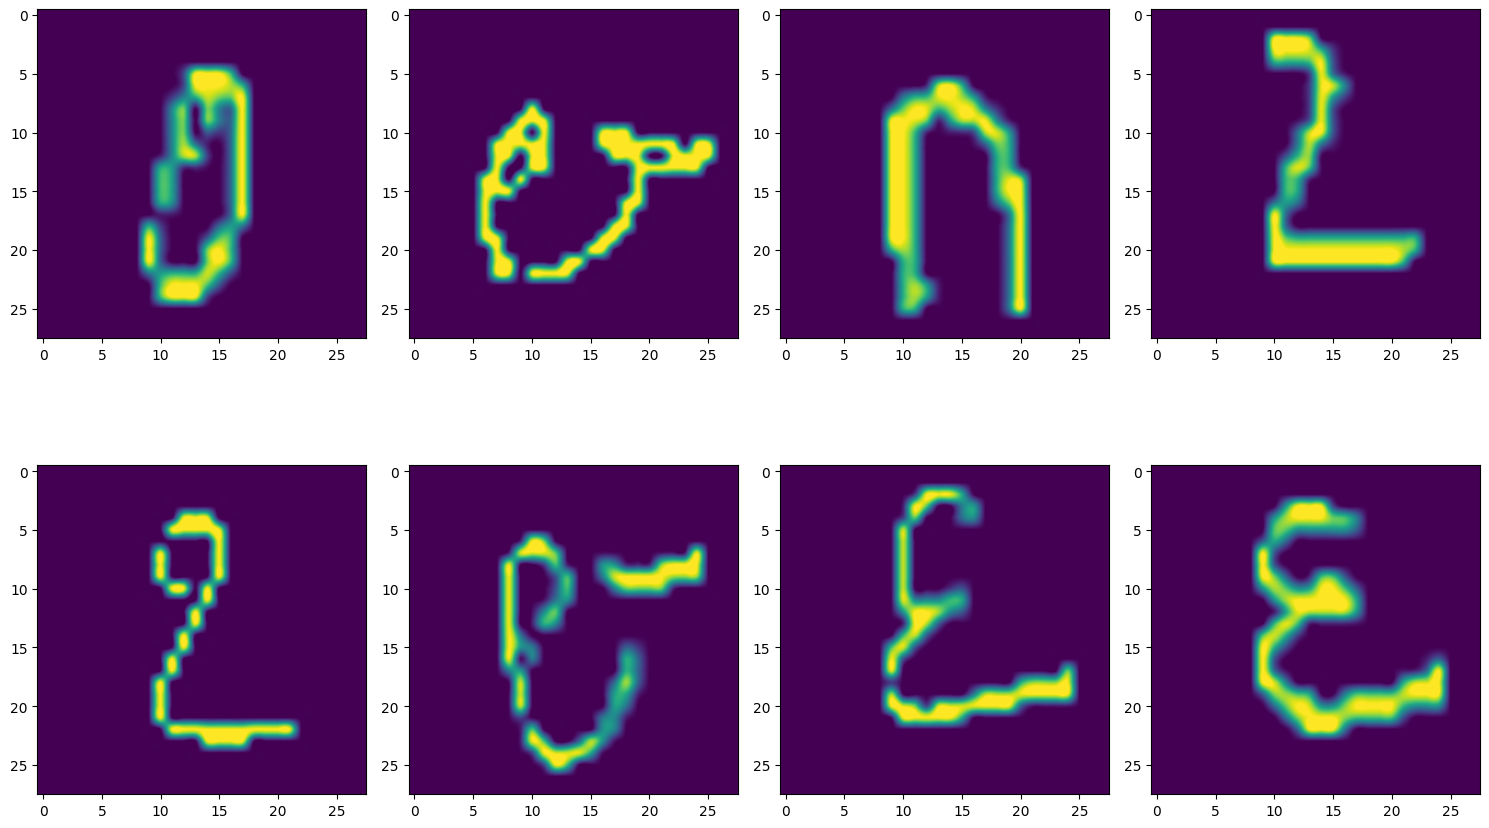

In [4]:
fig,ax=plt.subplots(2,4,figsize=(15,10))
num=0
for i in range(2):
    for j in range(4):
        ax[i][j].imshow(X_train_1[num].reshape(28,28), interpolation='spline16')
        num+=1
plt.tight_layout()
plt.show()

In [5]:
X_train_normalised=X_train_1/255
Y_train_normalised=Y_train_1/10
Y_train_normalised

array([0. , 0.8, 0.1, ..., 0.9, 0.3, 0.9])

In [6]:
def new_Y_train(Y_train_normalised,threshold=0.5):
    Y_train_2=np.zeros_like(Y_train_normalised)
    for i in range(Y_train_normalised.shape[0]):
        if Y_train_normalised[i]>=0.5:
            Y_train_2[i]=1
        else:
            Y_train_2[i]=0
    return Y_train_2
Y_train_2=new_Y_train(Y_train_normalised,threshold=0.5)
print(Y_train_2)

[0. 1. 0. ... 1. 0. 1.]


In [7]:
train_ratio=0.8
spilt_index=train_ratio*len(X_train_normalised)
spilt_index= int(spilt_index)
spilt_index

24000

In [8]:
x_train=X_train_normalised[:spilt_index]
x_val=X_train_normalised[spilt_index:]
y_train=Y_train_2[:spilt_index]
y_val=Y_train_2[spilt_index:]
y_train

array([0., 1., 0., ..., 1., 0., 0.])

In [9]:
df_test=pd.read_csv("/content/Classification_test.zip")
df_test

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,18563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,10057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_test=df_test.drop(['ID'],axis=1).values
print("x_test=",x_test)

x_test= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
X_test_normalised=x_test/255
X_test_normalised.max()

1.0

In [12]:
X=x_train[0,:]
X_train=x_train[1:,:]
X_train.shape

(23999, 784)

In [13]:
def cal_dist(X,X_train):
    distance=np.sqrt(np.sum((X-X_train)**2,axis=1))
    return distance

In [14]:
distances=cal_dist(X,X_train)
distances

array([10.19653468,  8.40642913,  8.4208014 , ...,  8.44146591,
        8.32850702,  8.19425348])

In [15]:
def nearest_neighbours(distances,k=7):
    nearest_indicies=np.argsort(distances)[:k]
    return nearest_indicies
k_nearest_indicies=nearest_neighbours(distances,k=7)
k_nearest_labels=y_train[k_nearest_indicies]
k_nearest_labels=np.int64(k_nearest_labels)
np.bincount(k_nearest_labels).argmax()

1

In [16]:
def predict(x_val, X_train, y_train, k):
    y_val_pred = np.zeros(x_val.shape[0], dtype=np.int64)
    for i in range(x_val.shape[0]):
        distances = cal_dist(x_val[i], X_train)
        k_nearest_indices = nearest_neighbours(distances, k)
        k_nearest_labels = y_train[k_nearest_indices]
        k_nearest_labels = np.int64(k_nearest_labels)
        y_val_pred[i] = np.bincount(k_nearest_labels).argmax()
    return y_val_pred
y_val_pred = predict(x_val, X_train, y_train, k=19)
print(y_val_pred)

[1 0 0 ... 0 1 1]


In [17]:
print("Y_val_pred=",y_val_pred)
print("Y_val=",y_val)

Y_val_pred= [1 0 0 ... 0 1 1]
Y_val= [0. 0. 0. ... 1. 0. 1.]


In [18]:
y_test_pred = predict(X_test_normalised, X_train, y_train, k=7)
print(y_test_pred)

[1 1 1 ... 0 0 0]


In [ ]:
def calculate_accuracy(y_val, y_val_pred):
    correct_predictions = np.sum(y_val == y_val_pred)
    total_predictions = len(y_val)
    accuracy = correct_predictions / total_predictions
    return accuracy
accuracy=calculate_accuracy(y_val, y_val_pred)
accuracy

0.503